In [2]:
import pandas as pd
import numpy as np

# Lecture de la base des données

In [3]:
#Lecture de la base des données
df = pd.read_csv("London_Air_Quality.csv")

# Statistiques exploratoires

In [4]:
df.head()

,Date,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI
0,2024-01-01 00:00:00+00:00,162.0,NaN,4.7,1.0,65.0,3.5,7.3,9.070833
1,2024-01-01 01:00:00+00:00,163.0,NaN,4.6,1.2,63.0,3.5,6.0,25.200000
2,2024-01-01 02:00:00+00:00,157.0,NaN,4.3,1.1,64.0,3.3,5.9,25.599998
3,2024-01-01 03:00:00+00:00,156.0,NaN,4.4,1.1,64.0,3.1,5.7,25.599998
4,2024-01-01 04:00:00+00:00,157.0,NaN,4.6,1.1,65.0,2.9,5.7,26.000000


In [15]:
df.sample(10) #echantillon aleatoire de 10 lignes pour voir l'interieur des données

,Date,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI
6410,2024-09-24 02:00:00+00:00,201.0,NaN,11.6,1.3,51.0,7.7,11.3,20.400000
8340,2024-12-13 12:00:00+00:00,254.0,478.0,45.6,7.3,20.0,24.0,31.4,33.641666
3042,2024-05-06 18:00:00+00:00,202.0,NaN,34.0,3.6,47.0,14.1,14.9,29.125000
1136,2024-02-17 08:00:00+00:00,227.0,NaN,46.8,9.2,16.0,14.2,21.0,25.674995
4374,2024-07-01 06:00:00+00:00,126.0,NaN,13.5,1.4,40.0,7.1,12.3,16.000000
3295,2024-05-17 07:00:00+00:00,222.0,NaN,35.0,7.5,28.0,20.8,25.1,29.233337
4567,2024-07-09 07:00:00+00:00,146.0,NaN,20.2,1.8,34.0,7.0,10.1,13.825002
665,2024-01-28 17:00:00+00:00,211.0,NaN,34.2,4.5,35.0,11.6,15.1,22.725000
7073,2024-10-21 17:00:00+00:00,227.0,NaN,54.2,6.3,9.0,16.0,21.7,25.680000
940,2024-02-09 04:00:00+00:00,134.0,NaN,5.9,1.2,60.0,2.6,5.6,24.000000


In [16]:
df['Date'].unique()

array(['2024-01-01 00:00:00+00:00', '2024-01-01 01:00:00+00:00',
       '2024-01-01 02:00:00+00:00', ..., '2024-12-31 21:00:00+00:00',
       '2024-12-31 22:00:00+00:00', '2024-12-31 23:00:00+00:00'],
      dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    8784 non-null   object 
 1   CO      8784 non-null   float64
 2   CO2     1608 non-null   float64
 3   NO2     8784 non-null   float64
 4   SO2     8784 non-null   float64
 5   O3      8784 non-null   float64
 6   PM2.5   8784 non-null   float64
 7   PM10    8784 non-null   float64
 8   AQI     8784 non-null   float64
dtypes: float64(8), object(1)
memory usage: 617.8+ KB


In [8]:
df.describe()

,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI
count,8784.000000,1608.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,187.744194,475.114428,21.797495,3.326093,49.154030,9.985178,14.136009,27.097212
std,49.121408,44.233857,15.321360,3.121396,23.235001,6.763177,7.891899,9.971780
min,105.000000,435.000000,1.800000,0.300000,0.000000,0.800000,1.200000,9.070833
25%,156.000000,450.000000,10.500000,1.400000,36.000000,5.300000,8.700000,20.800000
50%,177.000000,458.000000,16.900000,2.300000,51.000000,7.800000,11.900000,25.200000
75%,205.000000,482.000000,28.800000,4.000000,64.000000,12.500000,17.100000,30.341665
max,536.000000,786.000000,87.400000,41.300000,142.000000,45.100000,55.100000,70.370010


In [9]:
#Voir les valeurs manquantes
df.isna().sum()

Date        0
CO          0
CO2      7176
NO2         0
SO2         0
O3          0
PM2.5       0
PM10        0
AQI         0
dtype: int64

In [18]:
df['Date'] = pd.to_datetime(df['Date']) #convertir Date en format datetime
print(df.dtypes)

Date     datetime64[ns, UTC]
CO                   float64
CO2                  float64
NO2                  float64
SO2                  float64
O3                   float64
PM2.5                float64
PM10                 float64
AQI                  float64
dtype: object


In [20]:
df['Date_jour'] = df['Date'].dt.date #nouvelle colonne pour la date seule
print(df.dtypes)

Date         datetime64[ns, UTC]
CO                       float64
CO2                      float64
NO2                      float64
SO2                      float64
O3                       float64
PM2.5                    float64
PM10                     float64
AQI                      float64
Date_jour                 object
dtype: object


In [ ]:
df = df.drop(['Date', 'CO2'], axis=1) #Supprimer les colonnes Date et CO2

In [ ]:
df['Date_jour'] = pd.to_datetime(df['Date_jour']) #Ici on transformer la variable en format Datetime


In [28]:
moyennes_journalieres = df.groupby('Date_jour')[['CO','NO2','SO2','O3','PM2.5','PM10','AQI']].mean().reset_index()


### Ici, on compare les stats avant et après regroupement des données par jour

In [35]:
moyennes_journalieres.describe()

,CO,NO2,SO2,O3,PM2.5,PM10,AQI,Date_jour
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784
mean,187.744194,21.797495,3.326093,49.154030,9.985178,14.136009,27.097212,2024-07-01 12:00:00
min,105.000000,1.800000,0.300000,0.000000,0.800000,1.200000,9.070833,2024-01-01 00:00:00
25%,156.000000,10.500000,1.400000,36.000000,5.300000,8.700000,20.800000,2024-04-01 00:00:00
50%,177.000000,16.900000,2.300000,51.000000,7.800000,11.900000,25.200000,2024-07-01 12:00:00
75%,205.000000,28.800000,4.000000,64.000000,12.500000,17.100000,30.341665,2024-10-01 00:00:00
max,536.000000,87.400000,41.300000,142.000000,45.100000,55.100000,70.370010,2024-12-31 00:00:00
std,49.121408,15.321360,3.121396,23.235001,6.763177,7.891899,9.971780,NaN


In [32]:
df.describe()

,CO,NO2,SO2,O3,PM2.5,PM10,AQI,Date_jour
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784
mean,187.744194,21.797495,3.326093,49.154030,9.985178,14.136009,27.097212,2024-07-01 12:00:00
min,105.000000,1.800000,0.300000,0.000000,0.800000,1.200000,9.070833,2024-01-01 00:00:00
25%,156.000000,10.500000,1.400000,36.000000,5.300000,8.700000,20.800000,2024-04-01 00:00:00
50%,177.000000,16.900000,2.300000,51.000000,7.800000,11.900000,25.200000,2024-07-01 12:00:00
75%,205.000000,28.800000,4.000000,64.000000,12.500000,17.100000,30.341665,2024-10-01 00:00:00
max,536.000000,87.400000,41.300000,142.000000,45.100000,55.100000,70.370010,2024-12-31 00:00:00
std,49.121408,15.321360,3.121396,23.235001,6.763177,7.891899,9.971780,NaN


In [57]:
moyennes_journalieres = moyennes_journalieres.rename(columns={"Date_jour": "Date"})#on renomme Date_jour en Date

# Base Benzène

In [48]:
#Lecture de la base des données
file_path = "MY1_BENZENE_2024.csv"
df_benzene = pd.read_csv(file_path, skiprows=4)

In [45]:
data_benzene.head()

,"Date , 01:00, 02:00, 03:00, 04:00, 05:00, 06:00, 07:00, 08:00, 09:00, 10:00, 11:00, 12:00, 13:00, 14:00, 15:00, 16:00, 17:00, 18:00, 19:00, 20:00, 21:00, 22:00, 23:00, 24:00"
0,"01-01-2024,0.564707,0.786518,0.841429,0.508700..."
1,"02-01-2024,0.315213,0.180223, ,0.173393,0..."
2,"03-01-2024,0.219584,0.344818,0.252224,0.199581..."
3,"04-01-2024,0.696772,0.309210,0.252617,0.237504..."
4,"05-01-2024,0.319079,0.155012, ,0.126733,0..."


In [49]:
df_benzene.columns


Index(['   Date   ', ' 01:00', ' 02:00', ' 03:00', ' 04:00', ' 05:00',
       ' 06:00', ' 07:00', ' 08:00', ' 09:00', ' 10:00', ' 11:00', ' 12:00',
       ' 13:00', ' 14:00', ' 15:00', ' 16:00', ' 17:00', ' 18:00', ' 19:00',
       ' 20:00', ' 21:00', ' 22:00', ' 23:00', ' 24:00'],
      dtype='object')

In [53]:
# Nettoyage des noms de colonnes : suppression des espaces superflus
df_benzene.columns = df_benzene.columns.str.strip()

# Conversion des valeurs horaires en numériques (en ignorant les erreurs pour les valeurs vides)
for col in df_benzene.columns[1:]:  # on exclut la colonne 'Date'
    df_benzene[col] = pd.to_numeric(df_benzene[col], errors='coerce')

# Calcul de la moyenne journalière en ignorant les valeurs manquantes (NaN)
df_benzene['Moyenne_journalière'] = df_benzene.iloc[:, 1:].mean(axis=1)

# On garde juste la date et la moyenne
df_benzene_moyennes = df_benzene[['Date', 'Moyenne_journalière']]

# Affichage
print(df_benzene_moyennes.head())

         Date  Moyenne_journalière
0  01-01-2024             0.557676
1  02-01-2024             0.362716
2  03-01-2024             0.431034
3  04-01-2024             0.602937
4  05-01-2024             0.445602


In [65]:
#df_benzene_moyennes['Date'].unique()
df_benzene_moyennes.dtypes

Date       datetime64[ns]
Benzène           float64
dtype: object

In [64]:
df_benzene_moyennes = df_benzene_moyennes.rename(columns={"Moyenne_journalière": "Benzène"})#on renomme 

In [60]:
df_benzene_moyennes['Date'] = pd.to_datetime(df_benzene_moyennes['Date'], format='%d-%m-%Y', errors='coerce')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18084\3691824672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_benzene_moyennes['Date'] = pd.to_datetime(df_benzene_moyennes['Date'], format='%d-%m-%Y', errors='coerce')


# Fusion de deux bases de données

In [66]:
df_fusion = pd.merge(df_benzene_moyennes, moyennes_journalieres, on='Date', how='inner')

In [67]:
df_fusion

,Date,Benzène,CO,NO2,SO2,O3,PM2.5,PM10,AQI
0,2024-01-01,0.557676,173.625000,16.883333,3.025000,54.750000,5.029167,8.579167,21.411284
1,2024-01-02,0.362716,147.458333,13.370833,2.262500,63.208333,4.125000,6.500000,25.283333
2,2024-01-03,0.431034,175.041667,17.875000,2.929167,51.000000,5.612500,7.675000,21.110833
3,2024-01-04,0.602937,199.125000,29.491667,4.762500,38.041667,7.000000,11.658333,21.359653
4,2024-01-05,0.445602,207.333333,26.400000,4.762500,31.833333,12.687500,14.954167,19.680278
...,...,...,...,...,...,...,...,...,...
361,2024-12-27,0.789309,291.750000,72.579167,13.016667,3.541667,28.191667,34.937500,56.112915
362,2024-12-28,0.769923,244.250000,50.358333,6.920833,12.625000,22.150000,27.666667,61.439305
363,2024-12-29,0.667127,197.958333,33.341667,3.550000,27.625000,13.470833,16.354167,33.479168
364,2024-12-30,0.424513,167.500000,23.825000,2.541667,51.625000,5.620833,7.837500,22.256459


# Base Toluène

In [68]:
#Lecture de la base des données
file_path = "MY1_TOLUENE_2024.csv"
df_toluene = pd.read_csv(file_path, skiprows=4)

In [69]:
df_toluene

,Date,01:00,02:00,03:00,04:00,05:00,06:00,07:00,08:00,09:00,...,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,24:00
0,01-01-2024,0.831405,2.704514,2.630391,1.710956,1.234295,1.046494,0.876629,2.761623,0.985262,...,1.728869,1.174057,1.173407,0.937899,1.336077,0.927399,0.545425,0.568540,0.981961,0.409561
1,02-01-2024,0.453286,0.488297,0.428828,0.423928,0.288604,0.346539,0.558763,1.080491,1.435973,...,0.624471,0.797648,0.540062,1.229521,1.294353,1.279947,1.117075,0.983276,0.515536,1.016035
2,03-01-2024,0.465740,0.337033,0.307087,0.336838,0.283237,0.372339,0.526024,0.632557,1.465771,...,,,,,,1.400736,1.655897,1.424345,1.023042,1.566279
3,04-01-2024,1.402989,0.620255,0.625385,0.556150,0.402225,0.336222,0.677391,2.197707,1.388848,...,2.743522,1.355248,1.946628,1.440556,1.044222,1.297746,0.987274,0.502125,0.613994,0.436624
4,05-01-2024,0.318554,0.208120,0.132907,0.283241,0.499723,0.487937,0.756949,0.909341,1.387597,...,0.966289,0.958960,1.211042,1.671871,1.571940,1.415210,0.622443,0.567216,1.307618,1.138430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,27-12-2024,2.414667,1.375747,1.267263,1.090536,0.606538,0.761103,0.759083,0.832151,0.945920,...,2.350046,3.332791,2.353232,2.602292,3.040576,2.462420,2.763092,2.636159,,
362,28-12-2024,,,,,1.345464,1.092762,1.206276,1.381060,1.219557,...,1.849964,1.952067,1.616292,1.799733,1.351702,1.284809,0.978464,1.104398,0.654742,
363,29-12-2024,0.991906,0.786215,1.201185,0.988360,0.857545,0.319916,0.403621,1.095639,1.525737,...,2.697147,2.155631,1.371746,3.721490,4.033021,2.748732,4.794721,2.362512,2.448305,1.697078
364,30-12-2024,0.589742,0.583706,0.677796,0.366043,0.342190,0.272408,2.092674,0.786965,0.631796,...,1.354154,2.128576,1.089901,2.062314,1.776602,0.885828,1.392103,0.837383,1.328583,1.310005


In [71]:
# Nettoyage des noms de colonnes : suppression des espaces superflus
df_toluene.columns = df_toluene.columns.str.strip()

# Conversion des valeurs horaires en numériques (en ignorant les erreurs pour les valeurs vides)
for col in df_toluene.columns[1:]:  # on exclut la colonne 'Date'
    df_toluene[col] = pd.to_numeric(df_toluene[col], errors='coerce')

# Calcul de la moyenne journalière en ignorant les valeurs manquantes (NaN)
df_toluene['Toluène'] = df_toluene.iloc[:, 1:].mean(axis=1)

# On garde juste la date et la moyenne
df_toluene_moyennes = df_toluene[['Date', 'Toluène']]

# Affichage
print(df_toluene_moyennes.head())

         Date   Toluène
0  01-01-2024  1.220990
1  02-01-2024  0.798221
2  03-01-2024  0.961362
3  04-01-2024  1.940256
4  05-01-2024  0.938934


In [74]:
df_toluene_moyennes.dtypes

Date       datetime64[ns]
Toluène           float64
dtype: object

In [73]:
df_toluene_moyennes['Date'] = pd.to_datetime(df_toluene_moyennes['Date'], format='%d-%m-%Y', errors='coerce')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18084\142427471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_toluene_moyennes['Date'] = pd.to_datetime(df_toluene_moyennes['Date'], format='%d-%m-%Y', errors='coerce')


# Fusion avec Toluène

In [75]:
df_fusion_toluene = pd.merge(df_toluene_moyennes, df_fusion, on='Date', how='inner')

In [76]:
df_fusion_toluene

,Date,Toluène,Benzène,CO,NO2,SO2,O3,PM2.5,PM10,AQI
0,2024-01-01,1.220990,0.557676,173.625000,16.883333,3.025000,54.750000,5.029167,8.579167,21.411284
1,2024-01-02,0.798221,0.362716,147.458333,13.370833,2.262500,63.208333,4.125000,6.500000,25.283333
2,2024-01-03,0.961362,0.431034,175.041667,17.875000,2.929167,51.000000,5.612500,7.675000,21.110833
3,2024-01-04,1.940256,0.602937,199.125000,29.491667,4.762500,38.041667,7.000000,11.658333,21.359653
4,2024-01-05,0.938934,0.445602,207.333333,26.400000,4.762500,31.833333,12.687500,14.954167,19.680278
...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,1.800116,0.789309,291.750000,72.579167,13.016667,3.541667,28.191667,34.937500,56.112915
362,2024-12-28,1.394827,0.769923,244.250000,50.358333,6.920833,12.625000,22.150000,27.666667,61.439305
363,2024-12-29,1.818096,0.667127,197.958333,33.341667,3.550000,27.625000,13.470833,16.354167,33.479168
364,2024-12-30,1.103198,0.424513,167.500000,23.825000,2.541667,51.625000,5.620833,7.837500,22.256459


# Données météorlogiques

In [79]:
file_path = "export-londres2024.csv"
df_meteo = pd.read_csv(file_path, sep=',', skiprows=3)

In [80]:
df_meteo.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C_6H,TEMPERATURE_NOON_C_12H,TEMPERATURE_EVENING_C_18H,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,TEMPERATURE_NIGHT_C_3H,WEATHER_CODE_NIGHT_3H,TEMPERATURE_9H,WEATHER_CODE_9H,TEMPERATURE_15H,WEATHER_CODE_15H,TEMPERATURE_21H,WEATHER_CODE_21H,TEMPERATURE_MIDNIGHT_0H,WEATHER_CODE_MIDNIGHT_0H
0,2024-01-01,10,7,22,7,8,9,0.7,77,8.875,...,8,176,7,122,8,176,10,176,8,200
1,2024-01-02,12,9,41,11,12,9,3.3,94,7.750,...,11,116,11,266,12,122,10,176,11,296
2,2024-01-03,11,10,28,10,11,10,0.3,75,9.875,...,10,122,10,176,10,176,10,200,10,122
3,2024-01-04,8,6,17,6,8,7,0.5,83,9.000,...,8,176,6,113,8,176,7,353,8,119
4,2024-01-05,7,4,21,6,6,5,2.9,85,9.875,...,4,296,5,119,7,119,5,122,6,353


In [85]:
df_meteo['DATE'].unique

<bound method Series.unique of 0      2024-01-01
1      2024-01-02
2      2024-01-03
3      2024-01-04
4      2024-01-05
          ...    
361    2024-12-27
362    2024-12-28
363    2024-12-29
364    2024-12-30
365    2024-12-31
Name: DATE, Length: 366, dtype: object>

In [86]:
df_meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DATE                       366 non-null    object 
 1   MAX_TEMPERATURE_C          366 non-null    int64  
 2   MIN_TEMPERATURE_C          366 non-null    int64  
 3   WINDSPEED_MAX_KMH          366 non-null    int64  
 4   TEMPERATURE_MORNING_C_6H   366 non-null    int64  
 5   TEMPERATURE_NOON_C_12H     366 non-null    int64  
 6   TEMPERATURE_EVENING_C_18H  366 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM        366 non-null    float64
 8   HUMIDITY_MAX_PERCENT       366 non-null    int64  
 9   VISIBILITY_AVG_KM          366 non-null    float64
 10  PRESSURE_MAX_MB            366 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT     366 non-null    float64
 12  HEATINDEX_MAX_C            366 non-null    int64  
 13  DEWPOINT_MAX_C             366 non-null    int64  

In [113]:
# Calcul des variables dérivées
df_meteo['TEMP_MOY'] = df_meteo[[
    'TEMPERATURE_MORNING_C_6H',
    'TEMPERATURE_NOON_C_12H',
    'TEMPERATURE_EVENING_C_18H',
    'TEMPERATURE_NIGHT_C_3H'
]].mean(axis=1)

df_meteo['SR_EST_W_m2'] = df_meteo['SUNHOUR'] * 150
df_meteo['WINDSPEED_AVG_KMH'] = df_meteo['WINDSPEED_MAX_KMH'] * 0.6
df_meteo['HUMIDITY_EST_AVG'] = df_meteo['HUMIDITY_MAX_PERCENT'] * 0.75

# Sélection finale des colonnes pertinentes
colonnes_utiles = [
    'DATE',
    'MAX_TEMPERATURE_C',
    'MIN_TEMPERATURE_C',
    'TEMP_MOY',
    'HUMIDITY_MAX_PERCENT',
    'HUMIDITY_EST_AVG',
    'WINDSPEED_MAX_KMH',
    'WINDSPEED_AVG_KMH',
    'PRECIP_TOTAL_DAY_MM',
    'SUNHOUR',
    'SR_EST_W_m2',
    'PRESSURE_MAX_MB',
    'CLOUDCOVER_AVG_PERCENT'
]

df_meteo_model = df_meteo[colonnes_utiles]

# Affichage 
df_meteo_model


,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,TEMP_MOY,HUMIDITY_MAX_PERCENT,HUMIDITY_EST_AVG,WINDSPEED_MAX_KMH,WINDSPEED_AVG_KMH,PRECIP_TOTAL_DAY_MM,SUNHOUR,SR_EST_W_m2,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT
0,2024-01-01,10,7,8.00,77,57.75,22,13.2,0.7,1,150,1005,86.500
1,2024-01-02,12,9,10.75,94,70.50,41,24.6,3.3,1,150,992,92.125
2,2024-01-03,11,10,10.25,75,56.25,28,16.8,0.3,1,150,996,96.875
3,2024-01-04,8,6,7.25,83,62.25,17,10.2,0.5,3,450,1004,75.125
4,2024-01-05,7,4,5.25,85,63.75,21,12.6,2.9,7,1050,1008,84.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,9,6,8.00,85,63.75,5,3.0,0.0,7,1050,1035,25.250
362,2024-12-28,9,6,8.00,89,66.75,6,3.6,0.0,3,450,1031,64.625
363,2024-12-29,8,4,6.00,94,70.50,12,7.2,0.0,7,1050,1029,26.250
364,2024-12-30,7,5,6.00,96,72.00,14,8.4,0.0,7,1050,1029,45.250


- SR_EST_W_m2 ≈ quantité totale de rayonnement solaire journalier moyen, exprimée en Wh/m².
- SR (W/m²)≈ Energie solaire journalière(Wh/m²)/ Heures d’ensoleillement 

- Constante empirique (valeur moyenne en Europe en été) ~ 150 W/m² par heure 
- Proxy du rayonnemeny solaire à partir de SUNHOUR (Nombre d'heures d'ensolleiment)
df_meteo['SR_EST_W_m2'] = df_meteo['SUNHOUR'] * k
- Si on suppose que l’humidité est symétrique autour du max (ce qui est faux en général, mais acceptable sans données). 
L’humidité varie beaucoup entre le matin et l’après-midi. Donc ces approximations peuvent introduire du bruit si tu les utilises dans un modèle


In [114]:
df_meteo_model = df_meteo_model.rename(columns={"DATE": "Date"})

In [116]:
df_meteo_model['Date'] = pd.to_datetime(df_meteo_model['Date'], format='%Y-%m-%d', errors='coerce')

In [117]:
df_meteo_model

,Date,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,TEMP_MOY,HUMIDITY_MAX_PERCENT,HUMIDITY_EST_AVG,WINDSPEED_MAX_KMH,WINDSPEED_AVG_KMH,PRECIP_TOTAL_DAY_MM,SUNHOUR,SR_EST_W_m2,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT
0,2024-01-01,10,7,8.00,77,57.75,22,13.2,0.7,1,150,1005,86.500
1,2024-01-02,12,9,10.75,94,70.50,41,24.6,3.3,1,150,992,92.125
2,2024-01-03,11,10,10.25,75,56.25,28,16.8,0.3,1,150,996,96.875
3,2024-01-04,8,6,7.25,83,62.25,17,10.2,0.5,3,450,1004,75.125
4,2024-01-05,7,4,5.25,85,63.75,21,12.6,2.9,7,1050,1008,84.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,9,6,8.00,85,63.75,5,3.0,0.0,7,1050,1035,25.250
362,2024-12-28,9,6,8.00,89,66.75,6,3.6,0.0,3,450,1031,64.625
363,2024-12-29,8,4,6.00,94,70.50,12,7.2,0.0,7,1050,1029,26.250
364,2024-12-30,7,5,6.00,96,72.00,14,8.4,0.0,7,1050,1029,45.250


# Fusion finale

In [119]:
df_final = pd.merge(df_meteo_model,df_fusion_toluene, on='Date', how='inner')

In [120]:
df_final

,Date,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,TEMP_MOY,HUMIDITY_MAX_PERCENT,HUMIDITY_EST_AVG,WINDSPEED_MAX_KMH,WINDSPEED_AVG_KMH,PRECIP_TOTAL_DAY_MM,SUNHOUR,...,CLOUDCOVER_AVG_PERCENT,Toluène,Benzène,CO,NO2,SO2,O3,PM2.5,PM10,AQI
0,2024-01-01,10,7,8.00,77,57.75,22,13.2,0.7,1,...,86.500,1.220990,0.557676,173.625000,16.883333,3.025000,54.750000,5.029167,8.579167,21.411284
1,2024-01-02,12,9,10.75,94,70.50,41,24.6,3.3,1,...,92.125,0.798221,0.362716,147.458333,13.370833,2.262500,63.208333,4.125000,6.500000,25.283333
2,2024-01-03,11,10,10.25,75,56.25,28,16.8,0.3,1,...,96.875,0.961362,0.431034,175.041667,17.875000,2.929167,51.000000,5.612500,7.675000,21.110833
3,2024-01-04,8,6,7.25,83,62.25,17,10.2,0.5,3,...,75.125,1.940256,0.602937,199.125000,29.491667,4.762500,38.041667,7.000000,11.658333,21.359653
4,2024-01-05,7,4,5.25,85,63.75,21,12.6,2.9,7,...,84.750,0.938934,0.445602,207.333333,26.400000,4.762500,31.833333,12.687500,14.954167,19.680278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,9,6,8.00,85,63.75,5,3.0,0.0,7,...,25.250,1.800116,0.789309,291.750000,72.579167,13.016667,3.541667,28.191667,34.937500,56.112915
362,2024-12-28,9,6,8.00,89,66.75,6,3.6,0.0,3,...,64.625,1.394827,0.769923,244.250000,50.358333,6.920833,12.625000,22.150000,27.666667,61.439305
363,2024-12-29,8,4,6.00,94,70.50,12,7.2,0.0,7,...,26.250,1.818096,0.667127,197.958333,33.341667,3.550000,27.625000,13.470833,16.354167,33.479168
364,2024-12-30,7,5,6.00,96,72.00,14,8.4,0.0,7,...,45.250,1.103198,0.424513,167.500000,23.825000,2.541667,51.625000,5.620833,7.837500,22.256459


In [121]:
df_final.to_csv("df_final_london.csv", index=False)

# TESTS STATISTIQUES : COMPARAISON DES MOYENNES

In [123]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [125]:
df_final = pd.read_csv("df_final_london.csv")

In [127]:
correlation_matrix = df_final.corr(numeric_only=True)


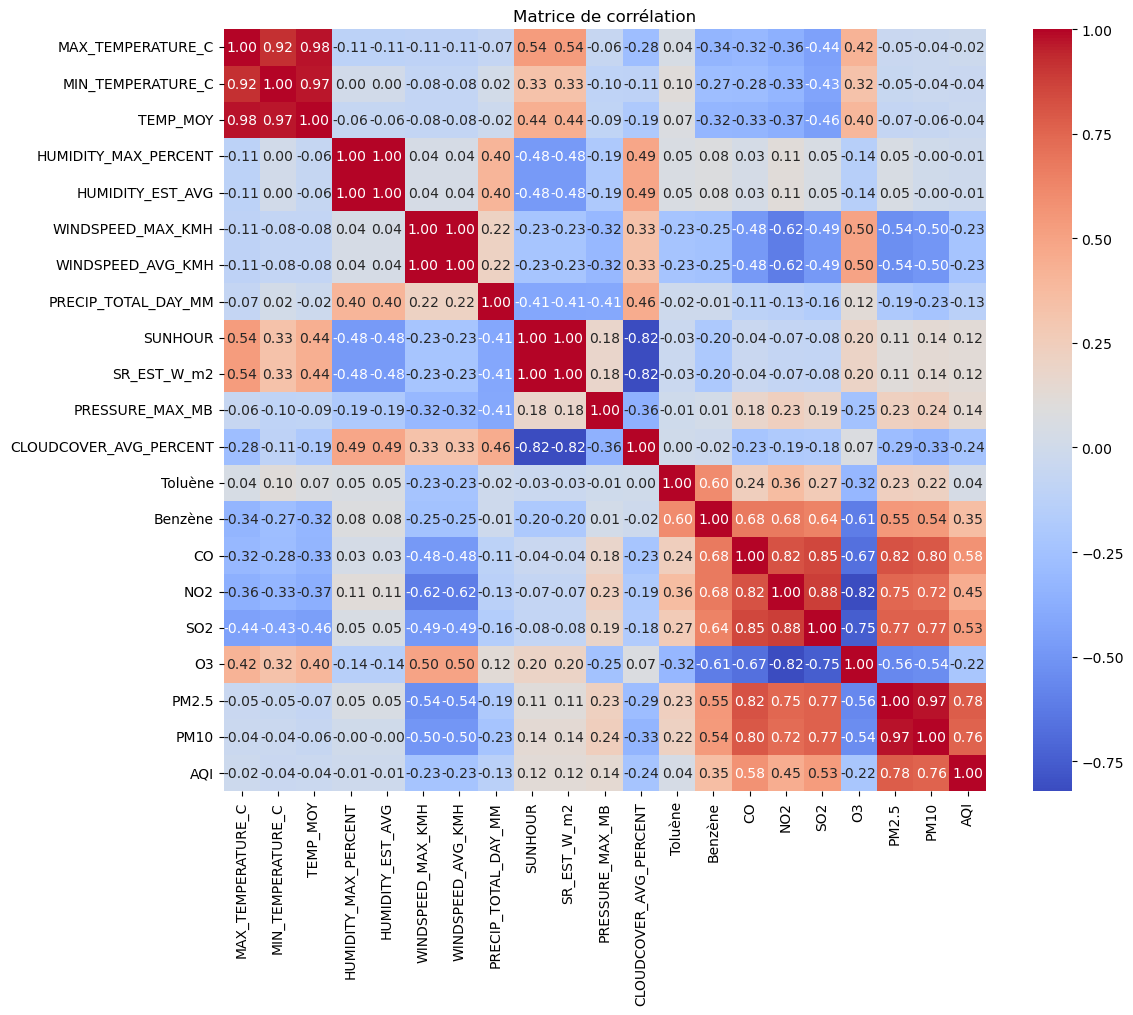

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()


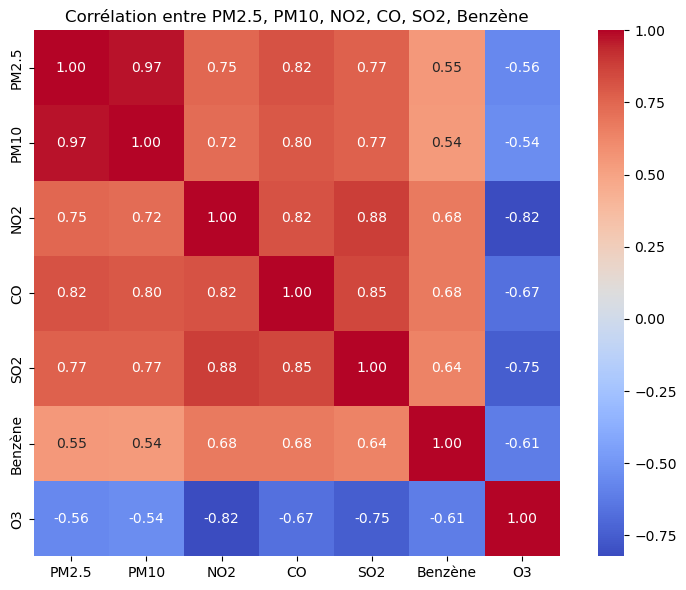

In [129]:
# Variables sélectionnées
variables_corr = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'Benzène','O3']

try:
    corr_matrix = df_final[variables_corr].corr()

    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
    plt.title("Corrélation entre PM2.5, PM10, NO2, CO, SO2, Benzène")
    plt.tight_layout()
    plt.show()

except Exception as e:
    print("Erreur : Merci de recharger le fichier contenant les variables sélectionnées. Détail :", e)


In [132]:
correlation_table = df_final[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'Benzène','O3']].corr()
print(correlation_table)


         PM2.5  PM10   NO2    CO   SO2  Benzène    O3
PM2.5     1.00  0.97  0.75  0.82  0.77     0.55 -0.56
PM10      0.97  1.00  0.72  0.80  0.77     0.54 -0.54
NO2       0.75  0.72  1.00  0.82  0.88     0.68 -0.82
CO        0.82  0.80  0.82  1.00  0.85     0.68 -0.67
SO2       0.77  0.77  0.88  0.85  1.00     0.64 -0.75
Benzène   0.55  0.54  0.68  0.68  0.64     1.00 -0.61
O3       -0.56 -0.54 -0.82 -0.67 -0.75    -0.61  1.00


📌 Seuils courants :
Corrélation > 0.8 ➜ très forte (⚠️ redondance possible)
Corrélation entre 0.5 et 0.8 ➜ modérée
Corrélation < 0.5 ➜ faible

In [145]:
import pandas as pd
import numpy as np

# Calcul de la matrice de corrélation
corr_matrix = df_final[["PM2.5", "PM10", "NO2", "CO", "SO2", "Benzène", "O3"]].corr().abs()

# Supprimer la diagonale et doublons
corr_pairs = (
    corr_matrix.where(~np.tril(np.ones(corr_matrix.shape)).astype(bool))
    .stack()
    .reset_index()
)

# Renommer les colonnes
corr_pairs.columns = ['Variable_1', 'Variable_2', 'Correlation']

# Afficher les paires fortement corrélées
corr_high = corr_pairs[corr_pairs['Correlation'] > 0.8]

print(corr_high.sort_values(by='Correlation', ascending=False))


   Variable_1 Variable_2  Correlation
0       PM2.5       PM10         0.97
12        NO2        SO2         0.88
15         CO        SO2         0.85
14        NO2         O3         0.82
11        NO2         CO         0.82
2       PM2.5         CO         0.82


In [148]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Définir X et y à partir du DataFrame df_final
X = df_final.drop(columns=['AQI','Date'])   # variables explicatives
y = df_final['AQI']                  # variable cible

# Entraîner le modèle
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# Importance des variables
importance = pd.DataFrame({
    'Variable': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance)


                  Variable  Importance
18                   PM2.5        0.66
17                      O3        0.09
19                    PM10        0.08
13                 Benzène        0.03
10         PRESSURE_MAX_MB        0.02
14                      CO        0.02
12                 Toluène        0.02
15                     NO2        0.02
11  CLOUDCOVER_AVG_PERCENT        0.01
16                     SO2        0.01
3     HUMIDITY_MAX_PERCENT        0.01
2                 TEMP_MOY        0.01
1        MIN_TEMPERATURE_C        0.01
0        MAX_TEMPERATURE_C        0.01
4         HUMIDITY_EST_AVG        0.00
6        WINDSPEED_AVG_KMH        0.00
5        WINDSPEED_MAX_KMH        0.00
7      PRECIP_TOTAL_DAY_MM        0.00
9              SR_EST_W_m2        0.00
8                  SUNHOUR        0.00


🎯 Comment faire le choix des variables ?
🧠 Règle générale :
> 0.05 = conserve

entre 0.01 et 0.05 = teste, peut être utile

< 0.01 = probablement inutile (ou bruit)



In [ ]:
# ANOVA : comparaison des moyennes d'AQI selon les mois par exemple (A faire)

# ECONOMETRIE

## Définition des variables du modèle

In [169]:
import pandas as pd
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# --- 1. Données
X = df_final[['PM2.5', 'PM10', 'O3', 'Benzène']].dropna()
y = df_final.loc[X.index, 'AQI']

# --- 2. Régression linéaire classique
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Résumé des performances
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
intercept = model.intercept_
coefficients = model.coef_

summary = pd.DataFrame({
    'Variable': ['Intercept'] + list(X.columns),
    'Valeur': [intercept] + list(coefficients)
})
metrics = pd.DataFrame({
    'Variable': ['RMSE', 'R²'],
    'Valeur': [rmse, r2]
})
final_summary = pd.concat([summary, metrics], ignore_index=True)
print("📋 Résumé du modèle de régression linéaire :")
print(final_summary)

# --- 3. Ajout : LazyRegressor pour comparer plusieurs modèles
from lazypredict.Supervised import LazyRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# Sous-échantillonnage rapide (optionnel)
X_sample = X.sample(frac=0.3, random_state=42)
y_sample = y.loc[X_sample.index]

X_train_lazy, X_test_lazy, y_train_lazy, y_test_lazy = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

reg = LazyRegressor(
    verbose=0,
    ignore_warnings=True,
    custom_metric=None,
    regressors=[LinearRegression, Ridge, Lasso, DecisionTreeRegressor, KNeighborsRegressor, RandomForestRegressor]
)

models, predictions = reg.fit(X_train_lazy, X_test_lazy, y_train_lazy, y_test_lazy)

print("\n⚙️ Comparaison automatique des modèles (LazyRegressor) :")
print(models)


📋 Résumé du modèle de régression linéaire :
    Variable  Valeur
0  Intercept    4.43
1      PM2.5    1.63
2       PM10   -0.25
3         O3    0.17
4    Benzène    2.71
5       RMSE    4.14
6         R²    0.58


  0%|          | 0/6 [00:00<?, ?it/s]


⚙️ Comparaison automatique des modèles (LazyRegressor) :
                       Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                 
LinearRegression                     0.73       0.79  4.48        0.04
Ridge                                0.73       0.79  4.50        0.02
RandomForestRegressor                0.56       0.66  5.72        0.37
Lasso                                0.54       0.65  5.85        0.03
KNeighborsRegressor                  0.48       0.61  6.19        0.02
DecisionTreeRegressor               -0.60      -0.23 10.91        0.03


Un bon modèle est celui dont le R carré est très élévé et le RMSE plus petit

## Vérification des hypothèses de Gauss-Markov

| Hypothèse                   | Test utilisé                           | Critère à respecter         |
| --------------------------- | -------------------------------------- | --------------------------- |
| 1. Linéarité                | Graphique résidus vs valeurs prédites  | Résidus centrés, sans motif |
| 2. Indépendance             | Durbin-Watson                          | ≈ 2                         |
| 3. Erreurs de moyenne nulle | Déduite du modèle (pas besoin de test) |                             |
| 4. Homoscédasticité         | Breusch-Pagan (`p > 0.05`)             | ✅ si non significatif       |
| 5. Pas de multicolinéarité  | VIF < 5 (ou 10)                        | ✅ si tous < seuil           |


### 1. Ajustement du modèle

In [170]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor #Multicolinéarité
from statsmodels.stats.stattools import durbin_watson #indépendace
from statsmodels.stats.diagnostic import het_breuschpagan #Homoscédasticité
from scipy.stats import shapiro #Normalités des résidus

import numpy as np

# 1. Ajustement du modèle
X_const = sm.add_constant(X)
X_const = X_const.astype(float)
y = y.astype(float)

# Nettoyage des NaN et inf
X_const = X_const.replace([np.inf, -np.inf], np.nan)
data_clean = pd.concat([X_const, y], axis=1).dropna()
X_const = data_clean.drop(columns=y.name)
y = data_clean[y.name]

# Modèle OLS
model = sm.OLS(y, X_const).fit()
residuals = model.resid
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    AQI   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     138.6
Date:                Fri, 04 Jul 2025   Prob (F-statistic):           2.53e-66
Time:                        02:38:32   Log-Likelihood:                -885.61
No. Observations:                 298   AIC:                             1781.
Df Residuals:                     293   BIC:                             1800.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0173      1.932      1.561      0.1

<Axes: title={'center': 'Importance des variables'}>

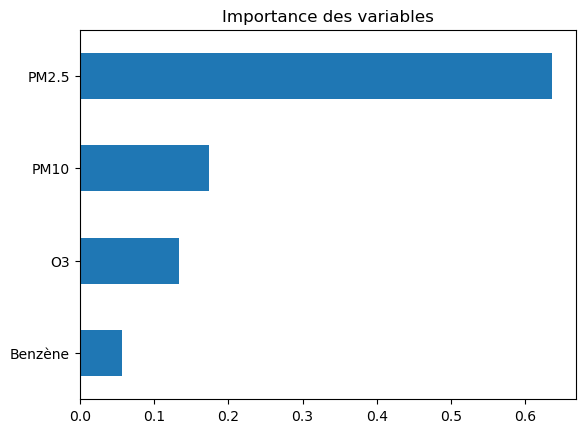

In [171]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances.sort_values().plot(kind='barh', title='Importance des variables')

### 2. Test d'indépendance des erreurs : Durbin-Watson

In [172]:
dw_stat = durbin_watson(residuals)
print(f"\nDurbin-Watson = {dw_stat:.3f} (≈2 = indépendance, <2 = autocorr. positive, >2 = négative)")


Durbin-Watson = 1.513 (≈2 = indépendance, <2 = autocorr. positive, >2 = négative)


### 3. Test de normalité des résidus : Shapiro-Wilk

In [173]:
shapiro_stat, shapiro_p = shapiro(residuals)
print(f"Shapiro-Wilk (normalité des résidus) : p = {shapiro_p:.4f} ({'OK' if shapiro_p > 0.05 else '⚠️ non normal'})")

Shapiro-Wilk (normalité des résidus) : p = 0.0000 (⚠️ non normal)


### 4. Test d'homoscédasticité : Breusch-Pagan

In [174]:
_, bp_pvalue, _, _ = het_breuschpagan(residuals, X_const)
print(f"Breusch-Pagan (homoscédasticité) : p = {bp_pvalue:.4f} ({'OK' if bp_pvalue > 0.05 else '⚠️ hétéroscédasticité'})")

Breusch-Pagan (homoscédasticité) : p = 0.0000 (⚠️ hétéroscédasticité)


### 5. Multicolinéarité : VIF

| Valeur du VIF | Interprétation                                 |
| ------------- | ---------------------------------------------- |
| VIF = 1       | Aucune colinéarité                             |
| 1 < VIF < 5   | Colinéarité modérée acceptable                 |
| VIF > 5       | Colinéarité forte (problématique à surveiller) |
| VIF > 10      | Colinéarité sévère (à corriger)                |  

In [175]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
print("\nVariance Inflation Factors (VIF):")
print(vif_data)


Variance Inflation Factors (VIF):
  Variable   VIF
0    const 49.00
1    PM2.5 21.66
2     PM10 20.79
3       O3  1.81
4  Benzène  1.80
